# 串流`LangChain`

In [1]:
from langchain_openai import ChatOpenAI
# 預設沒有指定model，會有費用問題
model = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [2]:
chunks = []
async for chunk in model.astream("請你告訴我 k8s 跟 docker 區別"):
    chunks.append(chunk)
    print(chunk.content, end="|", flush=True)

|K|ubernetes|（|通常|簡|稱|為| K|8|s|）|和| Docker| 是|兩|個|在|容|器|化|技|術|中|常|用|的|工具|，但|它|們|的|功能|和|用途|有所|不同|。|以下|是|它|們|之|間|的|主要|區|別|：

|1|.| **|基本|概|念|**|：
|  | -| **|Docker|**|：|Docker| 是|一|個|開|源|平台|，用|於|自|動|化|應|用|程序|的|部署|、|擴|展|和|管理|。|它|允|許|開|發|者|將|應|用|程序|及|其|依|賴|項|打|包|到|容|器|中|，|這|樣|可以|在|任何|環|境|中|一致|地|運|行|。
|  | -| **|K|ubernetes|**|：|K|ubernetes| 是|一|個|開|源|的|容|器|編|排|平台|，用|於|管理|和|自|動|化|容|器|化|應|用|程序|的|部署|、|擴|展|和|運|行|。|它|可以|管理|多|個|容|器|的|生命|週|期|，|並|提供|負|載|均|衡|、|服務|發|現|、|滾|動|更新|等|功能|。

|2|.| **|功能|**|：
|  | -| **|Docker|**|：|主要|用|於|創|建|和|運|行|容|器|。|它|提供|了|容|器|的|打|包|、|分|發|和|運|行|環|境|。
|  | -| **|K|ubernetes|**|：|主要|用|於|管理|多|個|容|器|的|集|群|。|它|提供|了|容|器|的|調|度|、|擴|展|、|負|載|均|衡|、|故|障|恢|復|等|功能|。

|3|.| **|使用|場|景|**|：
|  | -| **|Docker|**|：|適|合|單|個|應|用|程序|或|服務|的|容|器|化|，|特|別|是在|開|發|和|測|試|階|段|。
|  | -| **|K|ubernetes|**|：|適|合|需要|管理|多|個|容|器|的|生|產|環|境|，|特|別|是|微|服務|架|構|的|應|用|程序|。

|4|.| **|架|構|**|：
|  | -| **|Docker|**|：|包含| Docker| Engine|（|容|器|運|行|時|）、|Docker| Hub|（|容|器|映|像|庫|）|等|組|件|。
|  | -| **|K|ubernetes|**|：|由|

得到的是`AIMessageChunk`對象。這些塊在設計上是可累加的——只需簡單地將它們相加，就能得到到目前為止的完整響應狀態！

In [3]:
for chunk in model.stream("寫一首關於 k8s 的兒歌"):
    print(chunk.content, end="", flush=True)

### K8s 兒歌

（副歌）  
K8s，K8s，雲端小精靈，  
容器在舞動，服務真神奇！  
自動擴展，負載均衡，  
一起來學習，快樂又輕鬆！

（第一段）  
小小容器，裝著大世界，  
應用程式，隨時都能飛。  
Pod 在運行，像小船在海，  
K8s 幫忙，讓它們不累！

（副歌）  
K8s，K8s，雲端小精靈，  
容器在舞動，服務真神奇！  
自動擴展，負載均衡，  
一起來學習，快樂又輕鬆！

（第二段）  
服務發現，像找朋友，  
每個 Pod 都有，自己的家喔！  
滾動更新，不怕出錯，  
K8s 在守護，讓我們放心多！

（副歌）  
K8s，K8s，雲端小精靈，  
容器在舞動，服務真神奇！  
自動擴展，負載均衡，  
一起來學習，快樂又輕鬆！

（結尾）  
小小 K8s，讓世界更美，  
一起來探索，科技的未來！  
雲端的夢想，隨著你我飛，  
K8s 的旅程，永遠不會累！  

（副歌）  
K8s，K8s，雲端小精靈，  
容器在舞動，服務真神奇！  
自動擴展，負載均衡，  
一起來學習，快樂又輕鬆！

使用`StrOutputParser`來解析模型的輸出。這是一個簡單的解析器，它從 AIMessageChunk 中提取內容字段，給我們模型返回的 token。
`LCEL`是一種聲明式方法，用於通過鏈接不同的 LangChain 原語來指定"程序"。使用 LCEL 創建的鏈條會自動實現 stream 和 astream，允許串流最終輸出。
`StrOutputParser`用途就是把 Chunk 當中`content`提出

In [4]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("講一個早安問候語關於 {topic}")
parser = StrOutputParser()
chain = prompt | model | parser

async for chunk in chain.astream({"topic": "父母親"}):
    print(chunk, end="|", flush=True)

|早|安|！|願|今天|的|陽|光|帶|給|您|和|父|母|親|無|限|的|溫|暖|與|愛|。|感|謝|他|們|的|辛|勞|與|付|出|，|讓|我們|能|夠|在|這|個|美|好的|早|晨|迎|接|新|的一|天|。|希望|您|能|抽|空|陪|伴|他|們|，|分享|生活|中的|點|滴|，|讓|愛|在|每|一|個|早|晨|都|更加|深|厚|！||

Event Streaming 是一個 beta API
為了讓 astream_events API 正常工作
* 盡可能在整個代碼中使用 async（例如，異步工具等）
* 在定義自定義函數 runnalbes 時傳播 callbacks
* 當不使用 LCEL 而使用可運行對象時，確保調用 LLM 的`.astream()`而不是`.ainvoke`，以強制 LLM 串流 token

透過`Chat Model`看聊天模型產生的事件

In [5]:
events = []
async for event in model.astream_events("早安", version="v2"):
    events.append(event)

In [6]:
print(events)

[{'event': 'on_chat_model_start', 'data': {'input': '早安'}, 'name': 'ChatOpenAI', 'tags': [], 'run_id': 'cb430439-3a7a-4342-847c-cf114a5e9fe3', 'metadata': {'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}, 'parent_ids': []}, {'event': 'on_chat_model_stream', 'run_id': 'cb430439-3a7a-4342-847c-cf114a5e9fe3', 'name': 'ChatOpenAI', 'tags': [], 'metadata': {'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}, 'data': {'chunk': AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run--cb430439-3a7a-4342-847c-cf114a5e9fe3')}, 'parent_ids': []}, {'event': 'on_chat_model_stream', 'run_id': 'cb430439-3a7a-4342-847c-cf114a5e9fe3', 'name': 'ChatOpenAI', 'tags': [], 'metadata': {'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}, 'data': {'chunk': AIMessageChunk(content='早', additional_kwargs={}, response_metadata={

從一開始`on_chat_model_start`,`on_chat_model_stream`, 到最後 `on_chat_model_end`，透過條件判斷列印，方便識別事件

In [7]:
async for event in model.astream_events("早安", version="v2"):
    event_type = event["event"]
    if event_type =="on_chat_model_start":
        print("Streamgin Start", flush=False)
    if event_type == "on_chat_model_stream":
        content = event["data"]["chunk"].content
        if content:
          #要考慮一下回傳沒有的情況
          print(content, end="|", flush=False)
    if event_type == "on_chat_model_end":
        print("\nStreamgin End", flush=False)

Streamgin Start
早|安|！|今天|有什么|计划|吗|？|希望|你|有|个|美|好|的一|天|！|
Streamgin End


結合`StrOutputParser`整理串流輸出格式

In [8]:
prompt = ChatPromptTemplate.from_template("講一個早安問候語關於 {topic}")
parser = StrOutputParser()
chain = prompt | model | parser

parser_events = []
async for event in chain.astream_events({"topic": "父母親"}, version="v2"):
    parser_events.append(event)


觀察前6筆事件

In [10]:
print(parser_events[:6])

[{'event': 'on_chain_start', 'data': {'input': {'topic': '父母親'}}, 'name': 'RunnableSequence', 'tags': [], 'run_id': 'ae474a39-435d-4b96-919c-9d3066aa705f', 'metadata': {}, 'parent_ids': []}, {'event': 'on_prompt_start', 'data': {'input': {'topic': '父母親'}}, 'name': 'ChatPromptTemplate', 'tags': ['seq:step:1'], 'run_id': '2bbd8a64-404e-4042-a323-32c7ffdfea2b', 'metadata': {}, 'parent_ids': ['ae474a39-435d-4b96-919c-9d3066aa705f']}, {'event': 'on_prompt_end', 'data': {'output': ChatPromptValue(messages=[HumanMessage(content='講一個早安問候語關於 父母親', additional_kwargs={}, response_metadata={})]), 'input': {'topic': '父母親'}}, 'run_id': '2bbd8a64-404e-4042-a323-32c7ffdfea2b', 'name': 'ChatPromptTemplate', 'tags': ['seq:step:1'], 'metadata': {}, 'parent_ids': ['ae474a39-435d-4b96-919c-9d3066aa705f']}, {'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='講一個早安問候語關於 父母親', additional_kwargs={}, response_metadata={})]]}}, 'name': 'ChatOpenAI', 'tags': ['seq:step:2'], 'ru

出現了4個不同的開始事件
1. 整個鏈（模型 + 解析器）的啟動`on_chain_start`
2. 提示的啟動`on_prompt_start`
3. 模型的初始化`on_chat_model_start`
4. 解析器的準備階段`on_prompt_start`

透過條件判斷列印，方便識別事件

In [11]:
num_events = 0

async for event in chain.astream_events(
    {"topic": "父母親"},
    version="v2",
):
    kind = event["event"]
    if kind == "on_chat_model_stream":
        print(
            f"模型輸出 chunk: {repr(event['data']['chunk'].content)}",
            flush=True,
        )
    if kind == "on_parser_stream":
        print(f"解析器輸出 chunk: {event['data']['chunk']}", flush=True)
    num_events += 1
    if num_events > 30:
        # Truncate the output
        print("...")
        break

模型輸出 chunk: ''
解析器輸出 chunk: 
模型輸出 chunk: '早'
解析器輸出 chunk: 早
模型輸出 chunk: '安'
解析器輸出 chunk: 安
模型輸出 chunk: '！'
解析器輸出 chunk: ！
模型輸出 chunk: '願'
解析器輸出 chunk: 願
模型輸出 chunk: '今天'
解析器輸出 chunk: 今天
模型輸出 chunk: '的'
解析器輸出 chunk: 的
模型輸出 chunk: '陽'
解析器輸出 chunk: 陽
模型輸出 chunk: '光'
解析器輸出 chunk: 光
...


能分別監控並分析鏈，提供性能優化的數據源

按類型(type)過濾，只找`on_chat_model_*`(`chat_model`)

In [12]:
max_events = 0
async for event in chain.astream_events(
    {"topic": "父母親"},
    version="v2",
    include_types=["chat_model"],
):
    print(event)
    max_events += 1
    if max_events > 10:
        # Truncate output
        print("...")
        break


{'event': 'on_chat_model_start', 'data': {'input': {'topic': '父母親'}}, 'name': 'ChatOpenAI', 'tags': ['seq:step:2'], 'run_id': '07a205d0-98eb-4d99-a5a4-b791864bb229', 'metadata': {'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}, 'parent_ids': ['983f6cc7-ed74-4d6e-a1bf-a17a23759534']}
{'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run--07a205d0-98eb-4d99-a5a4-b791864bb229')}, 'run_id': '07a205d0-98eb-4d99-a5a4-b791864bb229', 'name': 'ChatOpenAI', 'tags': ['seq:step:2'], 'metadata': {'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}, 'parent_ids': ['983f6cc7-ed74-4d6e-a1bf-a17a23759534']}
{'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='早', additional_kwargs={}, response_metadata={}, id='run--07a205d0-98eb-4d99-a5a4-b791864bb229')}, 'run_id': '07a205d0-98eb-4d99-a5a4-b79186

綜合過濾：按類型(type)、名稱(name)和標籤(tags)
> name 好像沒有用，應該是版本問題

In [13]:
prompt = ChatPromptTemplate.from_template("講一個早安問候語關於 {topic}")
parser = StrOutputParser().with_config({"run_name": "my_str_parser"})

max_events = 0
async for event in chain.astream_events(
    {"topic": "父母親"},
    version="v2",
    include_names=["OAI_MODEL_GPT3.5"], 
    include_types=["chat_model", "prompt"],
    include_tags=["my_str_parser"],
):
    print(event)
    max_events += 1
    if max_events > 10:
        # Truncate output
        print("...")
        break

{'event': 'on_prompt_start', 'data': {'input': {'topic': '父母親'}}, 'name': 'ChatPromptTemplate', 'tags': ['seq:step:1'], 'run_id': 'f42e6173-bf40-41b2-ab90-999537363eeb', 'metadata': {}, 'parent_ids': ['b7028234-a23e-4b24-ba75-3f7d7f459654']}
{'event': 'on_prompt_end', 'data': {'output': ChatPromptValue(messages=[HumanMessage(content='講一個早安問候語關於 父母親', additional_kwargs={}, response_metadata={})])}, 'run_id': 'f42e6173-bf40-41b2-ab90-999537363eeb', 'name': 'ChatPromptTemplate', 'tags': ['seq:step:1'], 'metadata': {}, 'parent_ids': ['b7028234-a23e-4b24-ba75-3f7d7f459654']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='講一個早安問候語關於 父母親', additional_kwargs={}, response_metadata={})]]}}, 'name': 'ChatOpenAI', 'tags': ['seq:step:2'], 'run_id': '3b90cc41-b8cd-49d9-931c-93749ee62f55', 'metadata': {'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}, 'parent_ids': ['b7028234-a23e-4b24-ba75-3f7d7f459654']

## 串流`LangGraph`

定義工具

In [20]:
from typing import Literal

from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent

@tool
def recommend_night_market_food(preference: Literal["鹹食", "甜食"]):
    """推薦夜市小吃。"""
    if preference == "鹹食":
        return "推薦你試試饒河夜市的胡椒餅，外皮酥脆內餡多汁，是台北知名小吃！"
    elif preference == "甜食":
        return "來一份寧夏夜市的圓仔冰如何？Q彈的湯圓搭配清涼冰品，超級消暑！"
    else:
        raise AssertionError("未知偏好")

@tool
def recommend_bubble_tea(style: Literal["傳統", "創新"]):
    """推薦手搖飲。"""
    if style == "傳統":
        return "你一定要品嚐一下台中第四信用合作社對面的珍珠奶茶，香濃滑順，珍珠有嚼勁！"
    elif style == "創新":
        return "試試看西門町的芋圓冰沙拿鐵，結合了傳統芋圓和現代咖啡，口感層次豐富！"
    else:
        raise AssertionError("未知風格")

tools = [recommend_night_market_food, recommend_bubble_tea]
# 原本設定為[temperature=0]，會有費用問題
model = ChatOpenAI( 
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,)
graph = create_react_agent(model, tools)

藉由串流方式，不斷回應，同時 AI 會依照`tool`生成對應的提示詞，並以此為依據作答

In [21]:
inputs = {"messages": [("human", "我想吃夜市的小吃，有什麼推薦嗎？")]}
async for chunk in graph.astream(inputs, stream_mode="values"):
    #顯示最新訊息的內容，並且漂亮顯示出
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

我想吃夜市的小吃，有什麼推薦嗎？
================================== Ai Message ==================================

你喜歡鹹食還是甜食呢？這樣我可以更好地為你推薦夜市小吃！


In [23]:
inputs = {"messages": [("human", "鹹食")]}
async for chunk in graph.astream(inputs, stream_mode="values"):
    #顯示最新訊息的內容，並且漂亮顯示出
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

鹹食
================================== Ai Message ==================================
Tool Calls:
  recommend_night_market_food (call_qx82HdeLORV556J1MdxmjJUS)
 Call ID: call_qx82HdeLORV556J1MdxmjJUS
  Args:
    preference: 鹹食
================================= Tool Message =================================
Name: recommend_night_market_food

推薦你試試饒河夜市的胡椒餅，外皮酥脆內餡多汁，是台北知名小吃！
================================== Ai Message ==================================

我推薦你試試饒河夜市的胡椒餅，外皮酥脆，內餡多汁，是台北知名的小吃！


In [24]:
inputs = {"messages": [("human", "有什麼手搖飲推薦嗎？")]}
async for chunk in graph.astream(inputs, stream_mode="values"):
    final_result = chunk

final_result["messages"][-1].pretty_print()

================================== Ai Message ==================================

你喜歡傳統風味的手搖飲還是創新風味的手搖飲呢？


In [25]:
inputs = {"messages": [("human", "傳統風味")]}
async for chunk in graph.astream(inputs, stream_mode="values"):
    final_result = chunk

final_result["messages"][-1].pretty_print()

================================== Ai Message ==================================

這裡有一些傳統風味的推薦：

### 夜市小吃
- **推薦**：你可以試試「葱油饼」，外皮酥脆，內部柔軟，是台北知名的小吃！

### 手搖飲
- **推薦**：你一定要品嚐「台中第四信用合作社」的珍珠奶茶，香濃滑順，珍珠有嚼勁！


### 串流狀態更新(stream state updates)範例

In [26]:
inputs = {"messages": [("human", "我想喝夜市的特色飲料，該去哪裡？")]}
async for chunk in graph.astream(inputs, stream_mode="updates"):
    for node, values in chunk.items():
        print(f"接收來自節點 '{node}' 的更新:")
        values["messages"][-1].pretty_print()
        # print(values)
        # print("\n\n")

接收來自節點 'agent' 的更新:
================================== Ai Message ==================================

你可以考慮去當地的夜市，通常那裡會有許多特色飲料攤位。台灣的夜市特別有名，像是士林夜市、饒河街夜市和寧夏夜市等，這些地方都有各式各樣的手搖飲和特色飲品。

如果你有特定的飲料風格偏好（例如傳統或創新），我可以幫你推薦一些具體的手搖飲。你有什麼偏好嗎？


In [27]:
inputs = {"messages": [("human", "傳統的")]}
async for chunk in graph.astream(inputs, stream_mode="updates"):
    for node, values in chunk.items():
        print(f"接收來自節點 '{node}' 的更新:")
        values["messages"][-1].pretty_print()

接收來自節點 'agent' 的更新:
================================== Ai Message ==================================
Tool Calls:
  recommend_night_market_food (call_fM2biy1cZzT9l7O3ozak1C6P)
 Call ID: call_fM2biy1cZzT9l7O3ozak1C6P
  Args:
    preference: 鹹食
  recommend_bubble_tea (call_9G9ZCAsmpokG8BIreLIzlOtr)
 Call ID: call_9G9ZCAsmpokG8BIreLIzlOtr
  Args:
    style: 傳統
接收來自節點 'tools' 的更新:
================================= Tool Message =================================
Name: recommend_night_market_food

推薦你試試饒河夜市的胡椒餅，外皮酥脆內餡多汁，是台北知名小吃！
接收來自節點 'tools' 的更新:
================================= Tool Message =================================
Name: recommend_bubble_tea

你一定要品嚐一下台中第四信用合作社對面的珍珠奶茶，香濃滑順，珍珠有嚼勁！
接收來自節點 'agent' 的更新:
================================== Ai Message ==================================

這裡有一些傳統的推薦：

### 夜市小吃
你可以試試「鹽酥雞」，這是一道非常受歡迎的台灣夜市小吃，外酥內嫩，搭配多種調味料，絕對讓你回味無窮！

### 手搖飲
建議你品嚐「台中第四信用合作社」的珍珠奶茶，這款飲品香濃滑順，珍珠Q彈，是經典中的經典，值得一試！


### 多模式串流配置("values", "updates", "debug")

In [28]:
inputs = {"messages": [("human", "請推薦一個夜市的小吃和一個飲料")]}
async for event, chunk in graph.astream(inputs, stream_mode=["values", "updates", "debug"]):
    print(f"接收新的事件類型: {event}...")
    print(chunk)
    print("\n\n")

接收新的事件類型: values...
{'messages': [HumanMessage(content='請推薦一個夜市的小吃和一個飲料', additional_kwargs={}, response_metadata={}, id='a2ae1c2f-7b53-4d41-ae0a-ce990346ccf3')]}



接收新的事件類型: debug...
{'step': 1, 'timestamp': '2025-07-22T08:05:35.389108+00:00', 'type': 'task', 'payload': {'id': '9d384e52-ce5b-755f-0a42-89f3c07158e7', 'name': 'agent', 'input': {'messages': [HumanMessage(content='請推薦一個夜市的小吃和一個飲料', additional_kwargs={}, response_metadata={}, id='a2ae1c2f-7b53-4d41-ae0a-ce990346ccf3')], 'is_last_step': False, 'remaining_steps': 24}, 'triggers': ('branch:to:agent',)}}



接收新的事件類型: updates...
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8Yz3eFxgTR7fLtNLcT8hZunP', 'function': {'arguments': '{"preference": "鹹食"}', 'name': 'recommend_night_market_food'}, 'type': 'function'}, {'id': 'call_H8BhBd87FOMknKlN47gQyeO4', 'function': {'arguments': '{"style": "傳統"}', 'name': 'recommend_bubble_tea'}, 'type': 'function'}], 'refusal': None}, response_metadat

### 最終節點串流
只對結果感興趣的時候使用

In [29]:
from typing import Literal
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent


@tool
def recommend_night_market_food(preference: Literal["鹹食", "甜食"]):
    """推薦夜市小吃。"""
    if preference == "鹹食":
        return "推薦你試試饒河夜市的胡椒餅，外皮酥脆內餡多汁，是台北知名小吃！"
    elif preference == "甜食":
        return "來一份寧夏夜市的圓仔冰如何？Q彈的湯圓搭配清涼冰品，超級消暑！"
    else:
        raise AssertionError("未知偏好")

@tool
def recommend_bubble_tea(style: Literal["傳統", "創新"]):
    """推薦手搖飲。"""
    if style == "傳統":
        return "你一定要品嚐一下台中第四信用合作社對面的珍珠奶茶，香濃滑順，珍珠有嚼勁！"
    elif style == "創新":
        return "試試看西門町的芋圓冰沙拿鐵，結合了傳統芋圓和現代咖啡，口感層次豐富！"
    else:
        raise AssertionError("未知風格")

tools = [recommend_night_market_food, recommend_bubble_tea]
# 原本設定為[model_name="gpt-3.5-turbo", temperature=0]，會有費用問題
model = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,)
# 原本設定為[model_name="gpt-3.5-turbo", temperature=0]，會有費用問題
final_model = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,)

model = model.bind_tools(tools)
# NOTE: this is where we're adding a tag that we'll be using later to filter the outputs of the final node
final_model = final_model.with_config(tags=["final_node"])
     

In [30]:
from langgraph.prebuilt import ToolNode

tool_node = ToolNode(tools=tools)

#### 定義節點函數

In [31]:
from langgraph.graph.message import MessagesState
from langchain_core.messages import SystemMessage, HumanMessage

def should_continue(state: MessagesState) -> Literal["tools", "final"]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return "final"

def call_model(state: MessagesState):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages": [response]}

def call_final_model(state: MessagesState):
    messages = state["messages"]
    last_ai_message = messages[-1]
    response = final_model.invoke(
        [
            SystemMessage("美食部落客的口吻重新表達"),
            HumanMessage(last_ai_message.content),
        ]
    )
    response.id = last_ai_message.id
    return {"messages": [response]}


#### 定義圖結構

In [32]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)
workflow.add_node("final", call_final_model)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    should_continue,
)

workflow.add_edge("tools", "agent")
workflow.add_edge("final", END)
app = workflow.compile()


##### 列印圖的結構

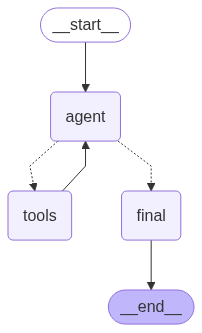

In [33]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

#### 從最終節點取得串流

In [34]:
inputs = {"messages": [("human", "請推薦一款傳統手搖飲")]}
async for chunk in app.astream(inputs, stream_mode="values"):
    #顯示最新訊息的內容，並且漂亮顯示出
    chunk["messages"][-1].pretty_print()
     

================================ Human Message =================================

請推薦一款傳統手搖飲
================================== Ai Message ==================================
Tool Calls:
  recommend_bubble_tea (call_P6DG0WI1XYJHN7xNnOlaXUvt)
 Call ID: call_P6DG0WI1XYJHN7xNnOlaXUvt
  Args:
    style: 傳統
================================= Tool Message =================================
Name: recommend_bubble_tea

你一定要品嚐一下台中第四信用合作社對面的珍珠奶茶，香濃滑順，珍珠有嚼勁！
================================== Ai Message ==================================

我推薦你試試台中第四信用合作社對面的珍珠奶茶，這款手搖飲香濃滑順，珍珠也非常有嚼勁，絕對值得一試！
================================== Ai Message ==================================

如果你來到台中，千萬不要錯過位於第四信用合作社對面的那家珍珠奶茶！這款手搖飲真的是香濃滑順，喝上一口就讓人心情大好。而且那顆顆珍珠更是Q彈有勁，咬下去的瞬間，滿滿的幸福感直擊心頭！絕對是值得一試的美味，快去品嚐吧！
